## Assignment 1

### Task 1
* For each cloud calculate the center and the radius.
    * The center is the average of all points from the cloud.
    * The radius is the biggest distance between the center and point from the cloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import pairwise_distances
import timeit
import math
# OLD
from scipy.spatial import distance

In [4]:
train_in = pd.read_csv('data/train_in.csv', header = None)
train_out = pd.read_csv('data/train_out.csv', names = 'D', header = None)
train = pd.concat([train_in, train_out], axis = 1)

test_in = pd.read_csv('data/test_in.csv', header = None)
test_out = pd.read_csv('data/test_out.csv', names = 'D', header = None)

In [43]:
centers = train.groupby('D').mean()
counts = pd.DataFrame(train['D'].value_counts()).sort_index().rename(columns={"D": "Counts"})

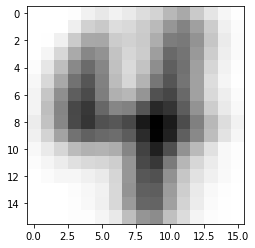

In [629]:
image = np.zeros((16,16))
row = 4
tmp = np.array(centers)
for i in range(0,16):
    for j in range(0,16):
        pix = 16*i+j
        image[i,j] = tmp[row, pix]
plt.imshow(image, cmap = 'binary')
plt.show()

In [4]:
# OLD
radius2 = []
for i in range(0, 10):
    X = train.loc[train['D'] == i]
    X = X.drop(columns=['D'])
    distances_2 = []
    for j in range(len(X)):
        distances_2.append(distance.euclidean(centers.iloc[i,:], X.iloc[j, :]))
    radius2.append(max(distances_2))
radius2 = pd.DataFrame(radius2, columns = ['Radius'], index = [list(range(0, 10))])

In [61]:
radius = []
for i in range(0, 10):
    X = train.loc[train['D'] == i]
    X = X.drop(columns=['D'])
    
    distances = pairwise_distances(centers, X)
    
    radius.append(max(distances[i]))

radius = pd.DataFrame(radius, columns = ['Radius'], index = [list(range(0, 10))])
radius

,Radius
0,15.892930
1,9.481363
2,14.168754
3,14.744759
4,14.533522
5,14.451951
6,14.031518
7,14.908969
8,13.705782
9,16.138696


In [62]:
distances = pd.DataFrame(squareform(pdist(centers)), 
                         columns = [list(range(0, 10))],
                         index = [list(range(0, 10))])
distances

,0,1,2,3,4,5,6,7,8,9
0,0.000000,14.449608,9.334556,9.143734,10.769844,7.519296,8.154443,11.864555,9.907902,11.488875
1,14.449608,0.000000,10.125323,11.733233,10.173786,11.118800,10.614700,10.743154,10.086777,9.932094
2,9.334556,10.125323,0.000000,8.178285,7.932541,7.906796,7.331808,8.872531,7.077516,8.887748
3,9.143734,11.733233,8.178285,0.000000,9.087608,6.118750,9.302065,8.922401,7.020425,8.354350
4,10.769844,10.173786,7.932541,9.087608,0.000000,8.001517,8.782233,7.583012,7.380909,6.010408
5,7.519296,11.118800,7.906796,6.118750,8.001517,0.000000,6.698692,9.211954,6.967386,8.258538
6,8.154443,10.614700,7.331808,9.302065,8.782233,6.698692,0.000000,10.888237,8.587222,10.440004
7,11.864555,10.743154,8.872531,8.922401,7.583012,9.211954,10.888237,0.000000,8.467785,5.426474
8,9.907902,10.086777,7.077516,7.020425,7.380909,6.967386,8.587222,8.467785,0.000000,6.401166
9,11.488875,9.932094,8.887748,8.354350,6.010408,8.258538,10.440004,5.426474,6.401166,0.000000


The radius of some the points very long, especially when it is compared with the differences between the centers. 

### Task 2

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

Simpliest classifier on training data

In [64]:
dist_train = pairwise_distances(train_in, centers)
pred_train = []
for i in dist_train:
    tmp_list = list(i)
    pred_train.append(tmp_list.index(min(tmp_list)))

In [65]:
print('Percentage of correctly classified digits', round(accuracy_score(train_out, pred_train), 3))

Percentage of correctly classified digits 0.864


Confusion matrix simpliest classifier on training data with euclidian distances

In [66]:
cm_train_eud = pd.DataFrame(confusion_matrix(train_out, pred_train))
cm_train_eud

,0,1,2,3,4,5,6,7,8,9
0,271,0,0,0,2,4,36,0,6,0
1,0,252,0,0,0,0,0,0,0,0
2,3,0,167,9,9,1,3,4,6,0
3,0,0,2,120,1,3,0,1,3,1
4,0,8,1,0,95,0,3,0,0,15
5,3,0,2,3,4,67,3,1,2,3
6,10,4,5,0,2,0,129,0,1,0
7,0,4,0,0,2,2,0,140,1,17
8,1,2,1,10,2,3,1,0,121,3
9,0,3,0,1,10,0,0,6,0,112


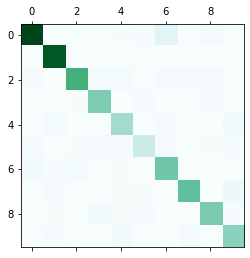

In [97]:
plt.matshow(cm_train_eud, cmap = 'BuGn')

In [79]:
dist_test = pairwise_distances(test_in, centers)
pred_test = []
for i in dist_test:
    tmp_list = list(i)
    pred_test.append(tmp_list.index(min(tmp_list)))
    
print('Percentage of correctly classified digits', round(accuracy_score(test_out, pred_test), 3))
cm_test_eud = pd.DataFrame(confusion_matrix(test_out, pred_test))
cm_test_eud

Percentage of correctly classified digits 0.804


,0,1,2,3,4,5,6,7,8,9
0,178,0,3,2,4,2,23,1,10,1
1,0,120,0,0,0,0,1,0,0,0
2,2,0,69,6,8,1,0,2,13,0
3,3,0,3,61,1,8,0,0,1,2
4,1,3,3,0,69,0,1,1,0,8
5,3,0,0,6,3,38,1,0,0,4
6,7,0,2,0,2,1,78,0,0,0
7,0,2,1,0,5,0,0,50,0,6
8,3,2,0,6,3,3,0,0,73,2
9,0,5,0,0,8,0,0,5,2,68


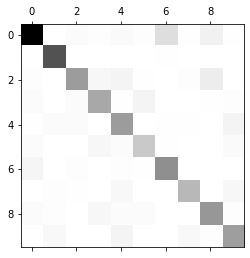

In [83]:
plt.matshow(cm_test_eud, cmap = "binary")

In [85]:
metrics = ['cityblock','cosine',  'euclidean', 'l1', 'l2', 'mahalanobis', 'minkowski', 'seuclidean', 'sqeuclidean']
accuracies = {}
for metric in metrics:
    dist_metrics = pairwise_distances(test_in, centers, metric = metric)
    pred_metrics = []
    for i in dist_metrics:
        tmp_list = list(i)
        pred_metrics.append(tmp_list.index(min(tmp_list)))
    acc = round(accuracy_score(test_out, pred_metrics), 3)
    accuracies[metric] = acc
accuracies

{'cityblock': 0.721,
 'cosine': 0.799,
 'euclidean': 0.804,
 'l1': 0.721,
 'l2': 0.804,
 'mahalanobis': 0.721,
 'minkowski': 0.804,
 'seuclidean': 0.79,
 'sqeuclidean': 0.804}

## Task 3

Steps to take [slide]:
1. initialize weights **w** at random
2. `while` (there are misclassified training examples)
    - select a misclassified example (**x**, $\textbf{c}_i$)
    - then some nodes are activated more than the node $c_i$
        - 1 update weights of these nodes by **-x**: $w = w - x$
        - 2 update weights of the node $c_i$ by **x**: $w = w + x$
        - 3 leave weights of all other nodes unchanged

    `end-while`

In [5]:
def AddBias(train_data):
    rows, cols = np.shape(train_data)
    bias = np.ones((rows, 1))
    
    return np.hstack((bias, train_data))

In [6]:
def CreateWeights(train_data_b):
        
    rows, rows_w = np.shape(train_data_b)
    cols_w = len(set(train_out['D']))
    
    weights = np.random.rand(rows_w, cols_w)
    
    return weights

In [7]:
def CreateOutput(train_data_b, weights):  
 
    out = np.dot(train_data_b, weights)
    
    return out

In [8]:
def Predict(output_data):
        
    predictions = np.argmax(output_data, axis = 1)
    
    return predictions

In [9]:
def TrainPerceptron(train_in, train_out):
    
    start = timeit.default_timer()

    train_in_b = AddBias(train_in)
    weights = CreateWeights(train_in_b)
    activities = CreateOutput(train_in_b, weights)
    classifications = Predict(activities)
    
    accuracies = []
    
    iterations = 0

    while not np.array_equal(classifications, np.array(train_out)[:,0]):
           
        iterations += 1
        if iterations == 500:
            break
        
        for i in enumerate(classifications):

            index = i[0]
            true_digit = np.array(train_out)[index] 

            if i[1] == true_digit:
                continue

            bench = activities[index, true_digit]
            cols_to_update = np.where(activities[index, :] > bench)[0]

            weights[:, cols_to_update] -= np.array(train_in_b)[index, :, None] 
            weights[:, true_digit] += np.array(train_in_b)[index, :, None]

        activities = CreateOutput(train_in_b, weights)
        classifications = Predict(activities)
        
        n = len(train_out)
        k = sum(classifications == np.array(train_out).flatten())
        accuracy = k/n * 100
    
        accuracies.append(accuracy)
    
    stop = timeit.default_timer()
    runtime = round(stop - start, 3)
    
    
    out = {'iterations':iterations, "runtime":runtime, 'weights':weights, 'accuracies':accuracies}
        
    return out

In [10]:
tmp = TrainPerceptron(train_in, train_out)

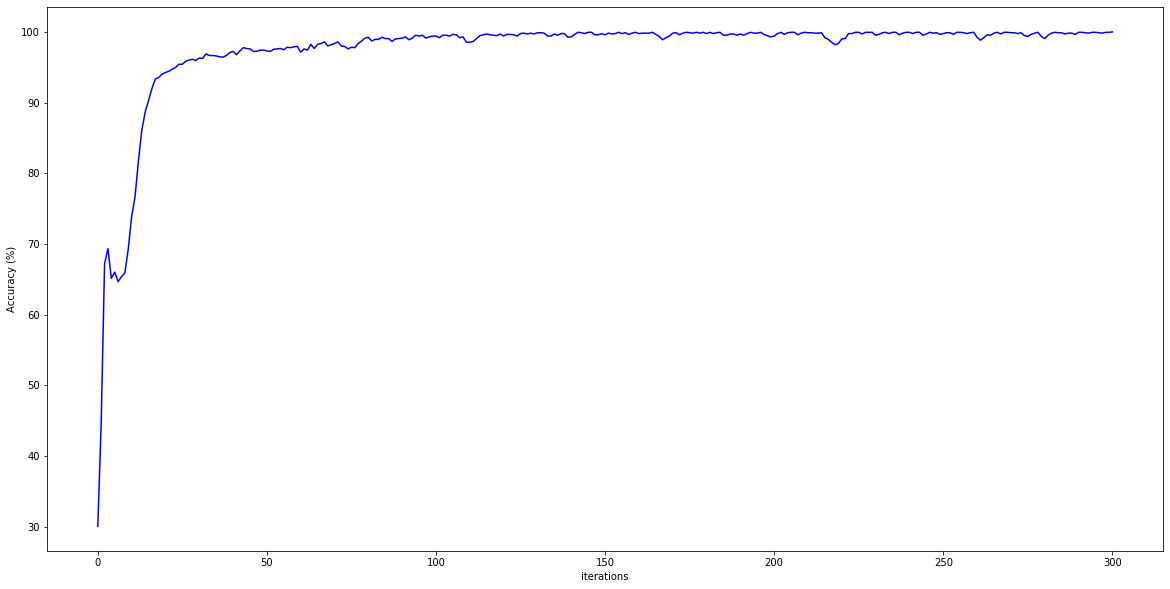

In [18]:
fig = plt.figure(figsize = (20,10))
plt.plot(range(len(tmp['accuracies'])), tmp['accuracies'], color = "blue")
plt.xlabel("iterations")
plt.ylabel("Accuracy (%)")

fig.savefig("accuracy.png")


In [ ]:
def TrainPerceptron_Geron(train_in, train_out):
    
    start = timeit.default_timer()

    train_in_b = AddBias(train_in)
    weights = CreateWeights(train_in_b)
    activities = CreateOutput(train_in_b, weights)
    classifications = Predict(activities)
    
    iterations = 0

    while not np.array_equal(classifications, np.array(train_out)[:,0]):
        
        iterations += 1
        if iterations == 500:
            break
        
        for i in enumerate(classifications):

            index = i[0]
            true_digit = np.array(train_out)[index] 

            bench = activities[index, true_digit]
            y_diff = bench - activities[index, ]

            weights += 0.0001 * np.multiply(np.array(train_in_b)[index, :, None], y_diff)

        activities = CreateOutput(train_in_b, weights)
        classifications = Predict(activities)
        
    stop = timeit.default_timer()
    runtime = round(stop - start, 3)
    
    out = {'iterations':iterations, "runtime":runtime, 'weights':weights}
        
    return out

In [163]:
def TestPerceptron(test_in, weights, true):
    
    true = np.array(true)[:, 0]
        
    test_in_b = AddBias(test_in)
    test_act = CreateOutput(test_in_b, weights)
    pred_out = Predict(test_act)
    
    n = len(true)
    k = sum(pred_out == true)
    accuracy = k/n
        
    out = {"accuracy": accuracy, "predictions": pred_out}
    
    return out

In [130]:
TrainPerceptron(train_in, train_out)

{'iterations': 278,
 'runtime': 7.364,
 'weights': array([[-2465.61422183, -2863.67794207, -2325.42153082, ...,
         -2647.14221911, -2495.2349813 , -2580.88322728],
        [ 2457.58349205,  2849.50091317,  2339.51673978, ...,
          2652.7721235 ,  2481.01901992,  2570.47986568],
        [ 2415.07784174,  2768.95462876,  2341.65012878, ...,
          2676.0970986 ,  2449.7169573 ,  2520.14362851],
        ...,
        [ 2207.77565426,  2699.77880877,  2461.11023272, ...,
          2332.70982785,  2285.21977004,  2473.99976166],
        [ 2376.38350168,  2781.13514453,  2397.77812184, ...,
          2493.3563987 ,  2415.17128071,  2522.04596987],
        [ 2448.08699916,  2841.37901989,  2360.77521642, ...,
          2623.89368446,  2475.42291278,  2560.65146581]])}

## Task 4

In [458]:
def binom(n, k):
    
    return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

In [505]:
def F(N, d):
    total_sum = 0
     
    if N <= (d + 1):
        prob = 1
    else:
        for i in list(range(d)):
            new_val = binom((N - 1),i)
            total_sum += new_val
        prob = total_sum / (2 ** (N - 1))  
    
    return prob

Is the set of all images of ones linearly separable from the set of all images of sevens?

*Answer:*
N < 2 * number of dimension: (252 + 166) < (2 * 256)
This matches with the results from the computation of F.

More general: if the total number of observations N within digitclasses *c1* and *c2* is bigger than the number of dimensions, in our case 256, the digitis will not be linearly separable. 

,Counts
0,319
1,252
2,202
3,131
4,122
5,88
6,151
7,166
8,144
9,132


In [552]:
tmp = train.loc[(train["D"] == 0) | (train["D"] == 1), ]
tmp_true = pd.DataFrame(tmp["D"].copy())
tmp =  tmp.drop(columns = ["D"])

In [573]:
np.shape(tmp)

(571, 256)

In [575]:
out = []

for i in range(10):
    for j in range(i + 1, 10):
        X = train.loc[(train["D"] == i) | (train["D"] == j), ]
        Y = pd.DataFrame(X["D"].copy())
        X = X.drop(columns = ["D"])
        
        N = X.shape[0] 
        
        trained = TrainPerceptron(X, Y)
        
        out.append((i, j, N, trained["iterations"]))

In [166]:
out = pd.DataFrame(out, columns = ["i", "j", "N", "iterations"])

NameError: name 'out' is not defined

In [28]:
x = np.array([0, 0])
inputs = np.array([(0,0), (0,1), (1,0), (1,1)])
y_true =[0, 1, 1, 0]

## Task 5

In [962]:
def CreateXORWeights(n_weights):
    out = np.random.normal(0, 1, n_weights)
    
    return out

In [963]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):
    return x * (1 - x)

In [964]:
def tanh(x):
    out = 2 / (1 + np.exp(-2 * x)) - 1
    
    return out

def tanh_prime(x):
    out = 1 - tanh(x)**2
    
    return out

In [965]:
def relu(x):
    if x < 0:
        out = 0
    else:
        out = x
        
    return out

def relu_prime(x):
    if x < 0:
        out = 0
    else:
        out = 1
        
    return out

In [1006]:
def softplus(x):
    out = np.log(1 + np.exp(x))
    
    return out

def softplus_prime(x):
    out = 1 / (1 + np.exp(-x))
    
    return out

In [1007]:
def xor_net(x, weights, func):
    hidden_weights = weights[:-3]
    output_weights = weights[6:]
    
    hidden_mat = np.array([[1, x[0], x[1], 0, 0, 0],
                     [0, 0, 0, 1, x[0], x[1]]])
    
    hidden_activities = np.dot(hidden_weights, hidden_mat.T)
    hidden_activity_1 = func(hidden_activities[0])
    hidden_activity_2 = func(hidden_activities[1])
    
    output_mat = np.vstack([1, hidden_activity_1, hidden_activity_2])
    output_activities = float(func(np.dot(output_weights, output_mat)))
    
    if output_activities > 0.5:
        classification = 1
    else:
        classification = 0
      
    out = {'hid_act1':hidden_activity_1, 'hid_act2' : hidden_activity_2, 
           'out_act' : output_activities, 'classification': classification}
    
    return(out)    

In [1008]:
def mse(inputs, weights, func):
    error = 0
    for x in inputs:
        y_pred = xor_net(x, weights, func)['out_act']
        y_true = (x[0] != x[1])
        
        error += (y_true - y_pred)**2
    MSE = error/len(inputs)
    
    return MSE

In [1207]:
def grdmse(x, weights, func, func_prime):
    activities = xor_net(x, weights, func)
    
    y_pred = activities['out_act']
    y_true = (x[0] != x[1])
    
    part_der_w0 = (y_pred - y_true)*func_prime(activities['out_act'])*weights[7]*func_prime(activities['hid_act1'])
    part_der_w1 = (y_pred - y_true)*func_prime(activities['out_act'])*weights[7]*func_prime(activities['hid_act1']*x[0])
    part_der_w2 = (y_pred - y_true)*func_prime(activities['out_act'])*weights[7]*func_prime(activities['hid_act1']*x[1])
    
    part_der_v0 = (y_pred - y_true)*func_prime(activities['out_act'])*weights[8]*func_prime(activities['hid_act2'])
    part_der_v1 = (y_pred - y_true)*func_prime(activities['out_act'])*weights[8]*func_prime(activities['hid_act2']*x[0])
    part_der_v2 = (y_pred - y_true)*func_prime(activities['out_act'])*weights[8]*func_prime(activities['hid_act2']*x[1])
    
    part_der_u0 = (y_pred - y_true)*func_prime(activities['out_act'])
    part_der_u1 = (y_pred - y_true)*func_prime(activities['out_act'])*activities['hid_act1']
    part_der_u2 = (y_pred - y_true)*func_prime(activities['out_act'])*activities['hid_act2']
    
    out = np.vstack([part_der_w0, part_der_w1, part_der_w2, 
                    part_der_v0, part_der_v1, part_der_v2,
                    part_der_u0, part_der_u1, part_der_u2])
    
    return out

In [1208]:
def update_weights(lr, weights, grd_weights):
    weights = weights - lr*grd_weights.flatten()
    
    return weights 

In [1236]:
def Train_XOR(inputs, lr, func, func_prime, weights, max_iterations = 1000):
    MSE = 1
    errors = []
    misclass = []
    iterations = 0
    
    while iterations < max_iterations:
        wrong_pred = 0
        iterations += 1
    
        for x in inputs:
            grd_weights = grdmse(x, weights, func, func_prime)
            weights = update_weights(lr, weights, grd_weights)
            
            y_pred = xor_net(x, weights, func)['classification']
            y_true = (x[0] != x[1])
            wrong_pred += int(y_pred != y_true)
            
        MSE = mse(inputs, weights, func)
        errors.append(MSE)
        misclass.append(wrong_pred)
        
        out = {'iterations':iterations, 'errors': errors, 'weights': weights, 'misclass':misclass }
        
    return out

In [1250]:
weights = CreateXORWeights(9)
inputs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])

In [1251]:
output_sigmoid = Train_XOR(inputs, 1, sigmoid, sigmoid_prime, weights)
output_tanh = Train_XOR(inputs, 0.5, tanh, tanh_prime, weights)
output_relu = Train_XOR(inputs, 0.05, relu, relu_prime, weights)
output_softplus = Train_XOR(inputs, 0.5, softplus, softplus_prime, weights)

In [1252]:
accuracies_sigmoid = (4 - np.array(output_sigmoid["misclass"]))/4 * 100
accuracies_tanh = (4 - np.array(output_tanh["misclass"]))/4 * 100
accuracies_relu = (4 - np.array(output_relu["misclass"]))/4 * 100
accuracies_softplus = (4 - np.array(output_softplus["misclass"]))/4 * 100

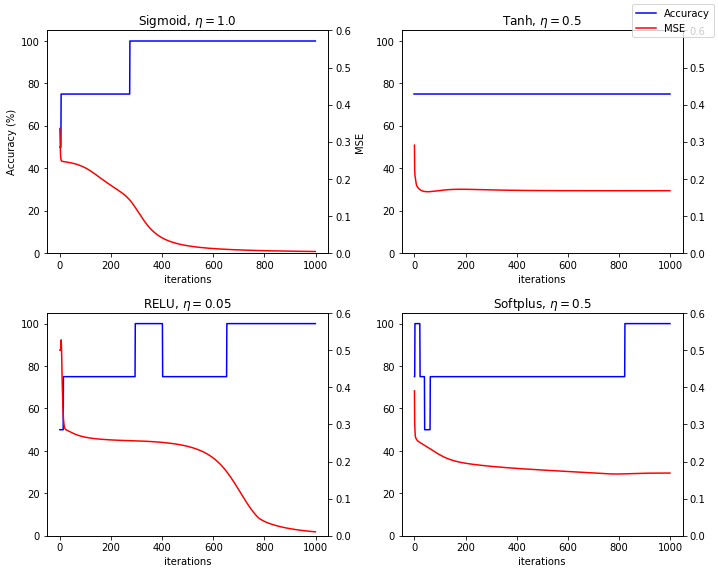

In [1304]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8), tight_layout = True)
ax5 = ax1.twinx() ; ax6 = ax2.twinx() ; ax7 = ax3.twinx() ; ax8 = ax4.twinx()

l1, = ax1.plot(np.arange(output_sigmoid["iterations"]), accuracies_sigmoid, color = 'blue')
ax1.set_ylim([0, 105])
ax1.set_title("Sigmoid, $\eta = 1.0$")
ax1.set_xlabel("iterations")
ax1.set_ylabel("Accuracy (%)")

ax2.plot(np.arange(output_tanh["iterations"]), accuracies_tanh, color = 'blue')
ax2.set_ylim([0, 105])
ax2.set_title("Tanh, $\eta = 0.5$")
ax2.set_xlabel("iterations")

ax3.plot(np.arange(output_relu["iterations"]), accuracies_relu, color = 'blue')
ax3.set_ylim([0, 105])
ax3.set_title("RELU, $\eta = 0.05$")
ax3.set_xlabel("iterations")

ax4.plot(np.arange(output_softplus["iterations"]), accuracies_softplus, color = 'blue')
ax4.set_ylim([0, 105])
ax4.set_title("Softplus, $\eta = 0.5$")
ax4.set_xlabel("iterations")

l2, = ax5.plot(np.arange(output_sigmoid["iterations"]), output_sigmoid["errors"], color = "red")
ax5.set_ylim([0, 0.6])
ax5.set_ylabel("MSE")

ax6.plot(np.arange(output_tanh["iterations"]), output_tanh["errors"], color = "red")
ax6.set_ylim([0, 0.6])

ax7.plot(np.arange(output_relu["iterations"]), output_relu["errors"], color = "red")
ax7.set_ylim([0, 0.6])

ax8.plot(np.arange(output_softplus["iterations"]), output_softplus["errors"], color = "red")
ax8.set_ylim([0, 0.6])

fig.legend([l1, l2],["Accuracy", "MSE"], loc = 1)

fig.savefig("gradient-descent.png")